**1.Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score # Import silhouette_score

import warnings
warnings.filterwarnings('ignore')

**2. Dataset Load**

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3.Data Preprocessing**

In [3]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

#Standardize data (important for K-Means)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

**4.Elbow Method**

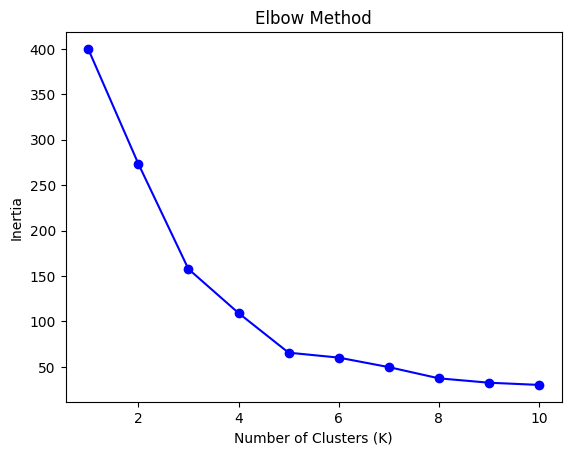

In [4]:
inertia=[]
K=range(1,11)

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K,inertia,'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**5.Fit K-Mean and Visualize clusters**

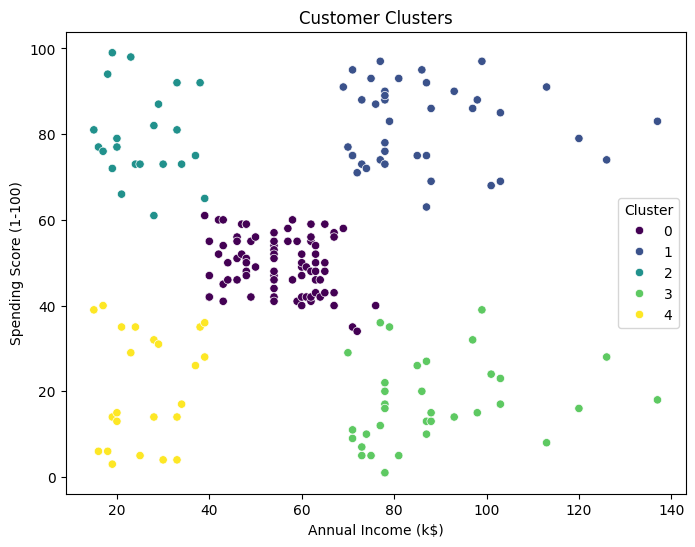

In [5]:
# Choose optimal k(e.g,5)
kmeans=KMeans(n_clusters=5,random_state=42)
df['Cluster']=kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',data=df,palette='viridis')
plt.title('Customer Clusters')
plt.show()

**6.Evaluate clustering**

In [6]:
silhouette=silhouette_score(X_scaled, df['Cluster'])
print('Silhouette Score:',silhouette)

Silhouette Score: 0.5546571631111091


**7.2D and PCA**

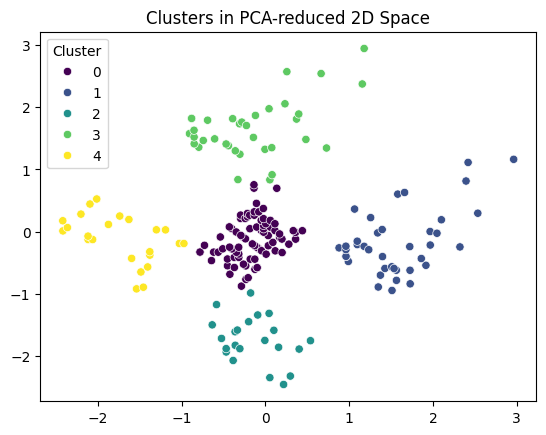

In [7]:
pca=PCA(2)
X_pca=pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['Cluster'],palette='viridis')
plt.title('Clusters in PCA-reduced 2D Space')
plt.show()

In [8]:
import plotly.express as px

wcss = []

for i in range(1,14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fig = px.line(x=range(1,14), y=wcss)

# edit the layout
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Number of Clusters',
                   yaxis_title='WCSS: Within-Cluster Sum of Square')

fig.show()